# Create SMA with Python

Import libraries

In [1]:
import numpy as np
import pandas as pd
import investpy as ip
# import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import plotly.express as px

Get historical data from stock name

In [10]:
#Define function to egt historical data with investpy
def get_stock_df(stock, country, from_date, to_date, interval):
    return ip.get_stock_historical_data(stock=stock,
                                  country=country,
                                  from_date=from_date,
                                  to_date=to_date,
                                  interval=interval)
historical data from 5 yeasr ago#get Aaple 
aapl = get_stock_df("AAPL", 'united states', '13/04/2017', '22/04/2022', 'daily')

aapl.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-04-13,35.48,35.59,35.26,35.26,71291520,USD
2017-04-17,35.37,35.47,35.22,35.46,66328376,USD
2017-04-18,35.35,35.51,35.28,35.30,58790176,USD
2017-04-19,35.47,35.50,35.11,35.17,69313504,USD
2017-04-20,35.30,35.73,35.29,35.61,93278248,USD


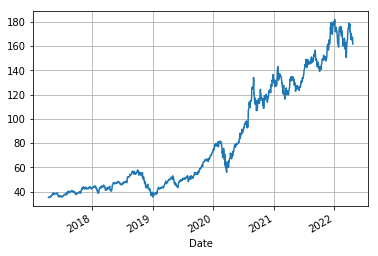

In [12]:
aapl["Close"].plot(grid=True)

Define a simple moving average from 30 and 100 entries window

In [130]:
# Define FIRST AND SECOND sma intervals
st_sma_interval = 30
nd_sma_interval = 50
#DEFINE FIRST AND SECOND  SMA INTERVALS NAME
st_sma_name = "sma"+str(st_sma_interval)
nd_sma_name = "sma"+str(nd_sma_interval)

st_sma  = pd.DataFrame()
nd_sma = pd.DataFrame()

st_sma["close_price"] = aapl["Close"].rolling(window = st_sma_interval).mean()
nd_sma["close_price"] = aapl["Close"].rolling(window = nd_sma_interval).mean()

View new DataFrame TAIL

In [131]:
print(st_sma.tail())
print(nd_sma.tail())

            close_price
Date                   
2022-04-18   167.300667
2022-04-19   167.570667
2022-04-20   167.897000
2022-04-21   168.012667
2022-04-22   168.121667
            close_price
Date                   
2022-04-18     167.6320
2022-04-19     167.5322
2022-04-20     167.4436
2022-04-21     167.2754
2022-04-22     166.9856


Create a simple graph with both sma and aapl close price

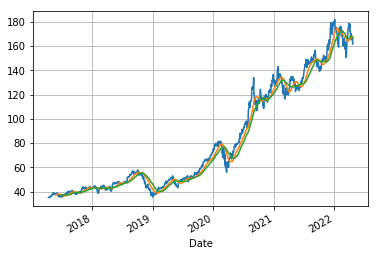

In [132]:
aapl["Close"].plot(grid=True)
st_sma["close_price"].plot(grid=True)
nd_sma["close_price"].plot(grid=True)

Create function to return a dataframe with sma cross signal of buy or sell

In [133]:
#buy and sell definitions
buy  = 1
sell = 0

def sma_signals(data):
    flag = -1
    
    data["signal"] = np.nan
    
    for i in range(len(data)):
        if data[st_sma_name][i] > data[nd_sma_name][i]:# if first sma cross second is a buy signal
            if flag != buy:
                data["signal"][i] = buy
                flag = buy
        elif data[st_sma_name][i] < data[nd_sma_name][i]:# if second sma cross first is a sell signal
            if flag != sell:
                data["signal"][i] = sell
                flag = sell
    
    return data.copy()


Prepare data with copy from AAPL

In [134]:
#Copy dataframe
aapl_ = aapl.copy()

#delete some columns
aapl_ = aapl_.drop(['High', 'Open', 'Low', 'Currency'], axis=1)

aapl_[st_sma_name] = st_sma["close_price"]
aapl_[nd_sma_name] = nd_sma["close_price"]
print(aapl_.tail())

             Close    Volume       sma30     sma50
Date                                              
2022-04-18  165.07  67372000  167.300667  167.6320
2022-04-19  167.40  67423000  167.570667  167.5322
2022-04-20  167.23  67718000  167.897000  167.4436
2022-04-21  166.42  86933000  168.012667  167.2754
2022-04-22  161.79  84169000  168.121667  166.9856


In [135]:
aapl_ = sma_signals(aapl_)
aapl_.tail()

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hari.moura\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Volume,sma30,sma50,signal
Date,,,,,
2022-04-18,165.07,67372000,167.300667,167.6320,NaN
2022-04-19,167.40,67423000,167.570667,167.5322,1.0
2022-04-20,167.23,67718000,167.897000,167.4436,NaN
2022-04-21,166.42,86933000,168.012667,167.2754,NaN
2022-04-22,161.79,84169000,168.121667,166.9856,NaN


In [138]:
aapl_.loc[ aapl_["signal"] == 1 ,"signal"]

Date
2017-06-23    1.0
2017-08-08    1.0
2017-11-07    1.0
2018-01-12    1.0
2018-03-20    1.0
2018-05-14    1.0
2018-08-02    1.0
2019-02-19    1.0
2019-07-11    1.0
2020-05-05    1.0
2020-11-09    1.0
2021-04-22    1.0
2021-07-01    1.0
2021-11-15    1.0
2022-04-19    1.0
Name: signal, dtype: float64

Create functioon to show a graph from dataframe with two sma cross

In [140]:
def show_sma_signals(data):
    ## Make subplot with Title
    fig = make_subplots(
            rows=2, 
            cols=1, 
            shared_xaxes=True, 
            specs=[[{"secondary_y": False}], [{"secondary_y": True}]],
            vertical_spacing=0.03,
            subplot_titles=(' AAPL close price history buy and sell signal ', ' Daily interval '),
            row_width=[0.2, 0.7],
    )

    ## Add Close datal as yAXIS
    fig.add_trace( 
        go.Scatter( 
            x=data.index, 
            y=data["Close"],
            mode="lines",
            name="Close"
        )
    )

    ## Add st_sma_name alongside Close data
    fig.add_trace(
        go.Scatter(
            x=data[st_sma_name].index, 
            y=data[st_sma_name],
            mode="lines",
            line_color="orange",
            name=st_sma_name,
            opacity=0.72
    )
    ,row=1, col=1)

    ## Add nd_sma_name alongside Close data
    fig.add_trace(
        go.Scatter(
            x=data[nd_sma_name].index, 
            y=data[nd_sma_name],
            mode="lines",
            name=nd_sma_name,
            line_color="yellow",
            opacity=0.72
    )
    ,row=1, col=1)

    #Add sell marker at firts cross second based on signal pre calculated
    fig.add_trace(
        go.Scatter(
            x=data[data["signal"] == sell].index, 
            y=data[data["signal"] == sell]["Close"],
            mode="markers",
            name="Sell",
            marker_color="red",
            marker_symbol="arrow-down-open",
            marker_size=7,
    )
    ,row=1, col=1)


    #Add sell marker at firts cross second based on signal pre calculated
    fig.add_trace(
        go.Scatter(
            x=data[data["signal"] == buy].index, 
            y=data[data["signal"] == buy]["Close"],
            mode="markers",
            name="Buy",
            marker_color="springgreen",
            marker_symbol="arrow-up-open",
            marker_size=7,
    )
    ,row=1, col=1)
    
    #change template
    fig.update_layout(
        template="plotly_dark", 
        xaxis_rangeslider_visible=True,
        height=700
    )

    fig.show()

In [139]:
show_sma_signals(aapl_.copy())